<a href="https://colab.research.google.com/github/MURALAAYYAPPA/Data-Visualization/blob/main/Daily%20Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

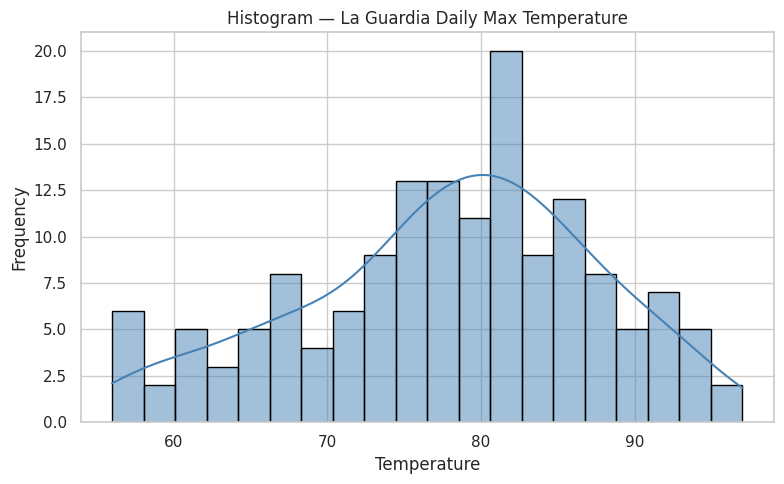

In [11]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import pi

sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Load data
df = pd.read_csv("airquality.csv")
df.columns = [c.strip() for c in df.columns]

# Identify temperature column
if 'Temp' in df.columns:
    temp_col = 'Temp'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
else:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    temp_col = numeric[0]

# Create x-axis (date or index)
if 'Date' in df.columns:
    df['__date'] = pd.to_datetime(df['Date'], errors='coerce')
    xcol = '__date'
elif {'Year','Month','Day'}.issubset(df.columns):
    df['__date'] = pd.to_datetime(df[['Year','Month','Day']])
    xcol = '__date'
else:
    df['__day_index'] = np.arange(1, len(df)+1)
    xcol = '__day_index'

# Clean data
df = df.dropna(subset=[temp_col]).reset_index(drop=True)

# Add Month & Day if missing
if 'Month' not in df.columns and xcol == '__date':
    df['Month'] = df[xcol].dt.month
if 'Day' not in df.columns and xcol == '__date':
    df['Day'] = df[xcol].dt.day

# Temperature categories
bins = [
    df[temp_col].min() - 1,
    df[temp_col].quantile(0.25),
    df[temp_col].quantile(0.5),
    df[temp_col].quantile(0.75),
    df[temp_col].max() + 1
]

labels = ['Very Low', 'Low', 'Moderate', 'High']
df['Temp_Category'] = pd.cut(
    df[temp_col],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[temp_col], bins=20, kde=True,
             color='steelblue', edgecolor='black')
plt.title("Histogram — La Guardia Daily Max Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import pi
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
df = pd.read_csv("airquality.csv")
df.columns = [c.strip() for c in df.columns]
df

,,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [5]:
# Identify temperature column
if 'Temp' in df.columns:
    temp_col = 'Temp'
elif 'Temperature' in df.columns:
    temp_col = 'Temperature'
else:
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    temp_col = numeric[0]


In [6]:
# Create x-axis (date or index)
if 'Date' in df.columns:
    df['__date'] = pd.to_datetime(df['Date'], errors='coerce')
    xcol = '__date'
elif {'Year','Month','Day'}.issubset(df.columns):
    df['__date'] = pd.to_datetime(df[['Year','Month','Day']])
    xcol = '__date'
else:
    df['__day_index'] = np.arange(1, len(df)+1)
    xcol = '__day_index'

In [7]:
# Clean data
df = df.dropna(subset=[temp_col]).reset_index(drop=True)

In [8]:
# Add Month & Day if missing
if 'Month' not in df.columns and xcol == '__date':
    df['Month'] = df[xcol].dt.month
if 'Day' not in df.columns and xcol == '__date':
    df['Day'] = df[xcol].dt.day


In [9]:
# Temperature categories
bins = [
    df[temp_col].min() - 1,
    df[temp_col].quantile(0.25),
    df[temp_col].quantile(0.5),
    df[temp_col].quantile(0.75),
    df[temp_col].max() + 1
]

labels = ['Very Low', 'Low', 'Moderate', 'High']
df['Temp_Category'] = pd.cut(
    df[temp_col],
    bins=bins,
    labels=labels,
    include_lowest=True
)

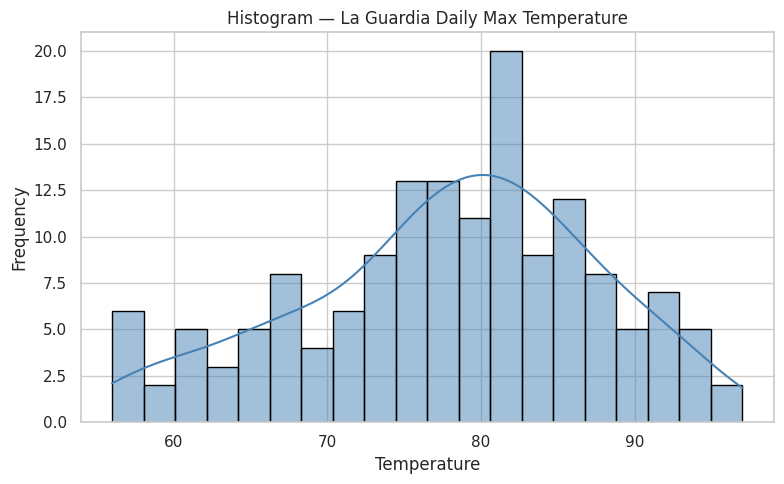

In [10]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[temp_col], bins=20, kde=True,
             color='steelblue', edgecolor='black')
plt.title("Histogram — La Guardia Daily Max Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()